In [1]:
import numpy as np, pandas as pd
import seaborn as sns
from math import sqrt
import math
import functools
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("dataset_191_wine.csv")


In [19]:
data.

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.775035,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,1.000000,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,2.000000,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
def normalize(data):
    for name in data.columns[1::]:
        lMax = data[name].max()
        lMin = data[name].min()
        lDist = lMax - lMin
        data[name] = (data[name] - lMin)/lDist
    data['class'] = data['class']-1

In [5]:
normalize(data)
data.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [6]:
def oneHot(dataToTransform):
    ndata = data.drop(['class'],axis=1)
    for i in range(3):
        ndata.insert(i,"Is class " + str(i+1),(data['class'] == (i)).astype(int))
    return ndata

In [7]:
dataOH = oneHot(data)
dataOH.head()

,Is class 1,Is class 2,Is class 3,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,0,0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,1,0,0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,1,0,0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,1,0,0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,1,0,0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [35]:
def minkowskiDistance(X,Y,p):
    dist = 0
    for x,y in zip(X,Y):
        dist += abs(x-y) ** p
    return dist ** (1/p)
def manhattanDistance(x,y):
    return minkowskiDistance(x,y,1)
def euclideanDistance(x,y):
    return minkowskiDistance(x,y,2)
def cosDistance(x,y):
    dist = 0
    a,b,c = 0,0,0
    for i in range(len(x)):
        a+=x[i]*y[i]
        b+=x[i]*x[i]
        c+=y[i]*y[i]
    return a/(sqrt(b)*sqrt(c))
def chebyshevDistance(x,y):
    dist = 0
    for x,y in zip(X,Y):
        dist = max(dist,abs(x-y))
    return dist
distances = [manhattanDistance, euclideanDistance, cosDistance,chebyshevDistance] 
dists = {'manhattan':manhattanDistance, 'euclidean':euclideanDistance, 'chebyshev':chebyshevDistance}

In [38]:
#Kernels
def gaussian(x):
    return math.exp(-x**2/2)/sqrt(2*math.pi)
def uniform(x):
    return 0 if abs(x) > 1 else 1/2
def triangular(x):
    return 0 if abs(x) > 1 else 1-abs(x)
def epanechnikov(x):
    return 0 if abs(x) > 1 else 3/4*(1-x ** 2)
def quartic(x):
    return 0 if abs(x) > 1 else 15/16*(1-x ** 2)** 2
def triweight(x):
    return 0 if abs(x) > 1 else 35/32*(1-x ** 2)** 3
def custom(x):
    return math.exp(-x**2)/sqrt(math.pi)
def tricube(x):
    return 0 if abs(x) > 1 else 70/81*(1-abs(x) ** 3)** 3
def cosine(x):
    return 0 if abs(x) > 1 else math.pi/4*math.cos(math.pi/2*x)
def logistic(x):
    return  1/(math.e ** x +2 +math.e ** (-x))
def sigmoid(x):
    return 2/math.pi * 1/(math.e ** x + math.e ** (-x))
    
kernels = [gaussian,uniform,triangular,epanechnikov,quartic,triweight,custom]
Kernels = {'uniform':uniform, 'triangular':triangular, 'epanechnikov':epanechnikov, 'quartic':quartic, 'triweight':triweight, 'tricube':tricube, 'gaussian':gaussian, 'cosine':cosine, 'logistic':logistic, 'sigmoid':sigmoid}

In [4]:
def predict(xtr, ytr, test,K = gaussian, dist = manhattanDistance, h = 0.1):
    a = 0
    b = 0
    for x,y in zip(xtr, ytr):
        a+=y*K(dist(x,test)/h)
        b+=K(dist(x,test)/h)
    return 0 if b == 0 else a/b
    

In [ ]:
def predictK(xtr, ytr, test,K = gaussian, dist = manhattanDistance, k = 1):

In [12]:
def split(data, trainSize):
    tmpDate = data.sample(frac = 1)
    train = tmpDate.iloc[0:trainSize]
    test = tmpDate.iloc[trainSize:]
    return train,test
train, test = split(data,150)

In [13]:
def toClassification(predicted):
    return [int(round(x)) for x in predicted]
def FScore(original, predicted, types = 3, beta = 1):
    c, fb , truePositive,falsePositive, falseNegative, TrueNegative, precisions, recalls = [[0 for _ in range(types)] for _ in range(8)]
    for orig, pred in zip(original, predicted):
        if (orig == pred):
            truePositive[orig]+=1
        else:
            falsePositive[pred]+=1
            falseNegative[orig]+=1
    for i in range(types):
        TrueNegative[i] = len(original) - truePositive[i] - falsePositive[i] - falseNegative[i]
        precisions[i] = 0 if truePositive[i] == 0 else truePositive[i]/(truePositive[i]+falsePositive[i])
        recalls[i] = 0 if truePositive[i] == 0 else truePositive[i]/(truePositive[i]+falseNegative[i])
        fb[i] = 0 if precisions[i] == 0 else (1+beta ** 2)*(precisions[i]*recalls[i])/(beta ** 2 * precisions[i] + recalls[i])
    for i in original:
        c[i]+=1
    f=0.0
    for i in range(types):
        f =f+c[i]*fb[i]/len(original)
    return f

In [14]:
def LOO(x,y,predicter):
    yPredicted = []
    for i in range(len(x)):
        partx = x[0:i]+x[(i+1):]
        party = y[0:i]+y[(i+1):]
        xtest = x[i:(i+1)]
        yPredicted.append(predicter(partx,party,xtest[0]))
    return yPredicted

In [15]:
XTrain, YTrain = data.drop("class",axis=1).values,data["class"].values
bestF = 0
hs = [0.1*h for h in range(1,20)]
for kernel in kernels:
    for distance in distances:
        for h in hs:
            predictor = functools.partial(predict, K = kernel, dist=distance, h = h)
            prediction = LOO(XTrain.tolist(), YTrain.tolist(), predictor)
            prediction = toClassification(prediction)
            localF = FScore(YTrain.tolist(), prediction)
            if (localF > bestF):
                print(kernel, distance, h, localF)
                bestF = max(bestF,localF)

<function gaussian at 0x000001CBF87C17B8> <function manhattanDistance at 0x000001CBF89F16A8> 0.1 0.9602783530026116
<function gaussian at 0x000001CBF87C17B8> <function manhattanDistance at 0x000001CBF89F16A8> 0.4 0.9660128746456331
<function gaussian at 0x000001CBF87C17B8> <function manhattanDistance at 0x000001CBF89F16A8> 0.5 0.9660316235538238
<function gaussian at 0x000001CBF87C17B8> <function manhattanDistance at 0x000001CBF89F16A8> 0.6000000000000001 0.9717211088202107
<function gaussian at 0x000001CBF87C17B8> <function manhattanDistance at 0x000001CBF89F16A8> 1.1 0.9718813176717017
<function gaussian at 0x000001CBF87C17B8> <function euclideanDistance at 0x000001CBF89F1730> 0.30000000000000004 0.9774106955923552
<function custom at 0x000001CBF880B158> <function euclideanDistance at 0x000001CBF89F1730> 0.5 0.9775280898876405


In [16]:
#OneHot
XTrainOh, YTrainOh= dataOH.drop(["Is class 1","Is class 2", "Is class 3"], axis = 1).values.tolist(),dataOH[["Is class 1","Is class 2", "Is class 3"]] 
bestF = 0
hs = [0.1*h for h in range(1,15)]
def LOO3(XTrainOh,YTrainOh, kernel, distance,h):
    predictor = functools.partial(predict, K = kernel, dist=distance, h = h)
    prediction1 = LOO(XTrainOh, YTrainOh["Is class 1"].values.tolist(), predictor)
    prediction2 = LOO(XTrainOh, YTrainOh["Is class 2"].values.tolist(), predictor)
    prediction3 = LOO(XTrainOh, YTrainOh["Is class 3"].values.tolist(), predictor)
    prediction = []
    for is1, is2, is3 in zip(prediction1,prediction2, prediction3):
        if (max(is1,is2,is3) == is1):
            prediction.append(0)
        elif (max(is1,is2,is3) == is2):
            prediction.append(1)
        else:
            prediction.append(2)
    return prediction
for kernel in kernels:
    for distance in distances:
        for h in hs:
            prediction = LOO3(XTrainOh, YTrainOh, kernel,distance, h)
            localF = FScore(YTrain.tolist(), prediction)
            if (localF > bestF):
                print(kernel, distance, h, localF)
                bestF = max(bestF,localF)

<function gaussian at 0x000001CBF87C17B8> <function manhattanDistance at 0x000001CBF89F16A8> 0.1 0.9602783530026116
<function gaussian at 0x000001CBF87C17B8> <function manhattanDistance at 0x000001CBF89F16A8> 0.4 0.9660128746456331
<function gaussian at 0x000001CBF87C17B8> <function manhattanDistance at 0x000001CBF89F16A8> 0.5 0.9660316235538238
<function gaussian at 0x000001CBF87C17B8> <function manhattanDistance at 0x000001CBF89F16A8> 0.6000000000000001 0.9717211088202107
<function gaussian at 0x000001CBF87C17B8> <function manhattanDistance at 0x000001CBF89F16A8> 1.4000000000000001 0.9774403017265569
<function gaussian at 0x000001CBF87C17B8> <function euclideanDistance at 0x000001CBF89F1730> 0.5 0.9830867820512499


In [17]:
heights = [0.05*i for i in range(1,30)]
fscores = []
fscores2 =[]
fscores3 = []
for h in heights:
    fscores.append(FScore(YTrain.tolist(), LOO3(XTrainOh, YTrainOh,gaussian, euclideanDistance,h)))
    fscores2.append(FScore(YTrain.tolist(), LOO3(XTrainOh, YTrainOh,uniform, euclideanDistance,h)))
    fscores3.append(FScore(YTrain.tolist(), LOO3(XTrainOh, YTrainOh,gaussian, manhattanDistance,h)))

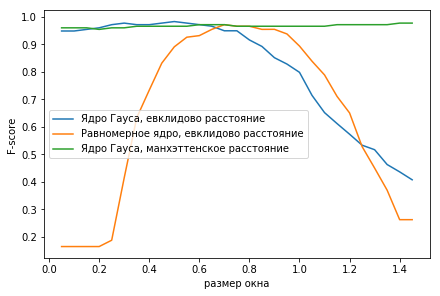

In [18]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(heights, fscores, label = 'Ядро Гауса, евклидово расстояние')
ax.plot(heights, fscores2, label = 'Равномерное ядро, евклидово расстояние')
ax.plot(heights, fscores3, label = 'Ядро Гауса, манхэттенское расстояние')
ax.set_xlabel('размер окна')
ax.set_ylabel('F-score')
ax.legend()
plt.show()

In [15]:
n, m = [int(x) for x in input().split(" ")]
xs = [[int(v) for v in input().split(" ")] for x in range(n)]

3 2
0 2 1
1 1 0
2 0 1


In [26]:
q = [int(v) for v in input().split(" ")]

[[0, 2, 1], [1, 1, 0], [2, 0, 1]]

In [32]:
ys = [x[-1] for x in xs]
xs = [x[:-1] for x in xs]

In [36]:
dist = dists[input()]

euclidean


<function __main__.euclideanDistance(x, y)>